In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [7]:
df = pd.read_csv("data/filtered_data.csv")

In [8]:
def quartile_analysis(column_name):
    q1 = df[column_name].quantile(0.25)
    q2 = df[column_name].quantile(0.50)  # Median
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    print(f"\n{column_name} Quartile Ranges:")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Median (Q2): {q2}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR: {iqr}")

    return q1, q2, q3, iqr

quartile_analysis("Composite score")
quartile_analysis("All districts")


Composite score Quartile Ranges:
Q1 (25th percentile): 19.8
Median (Q2): 21.4
Q3 (75th percentile): 23.200000000000003
IQR: 3.400000000000002

All districts Quartile Ranges:
Q1 (25th percentile): 9815.5
Median (Q2): 11276.0
Q3 (75th percentile): 14585.0
IQR: 4769.5


(np.float64(9815.5),
 np.float64(11276.0),
 np.float64(14585.0),
 np.float64(4769.5))


Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:        Composite score   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     27.99
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           2.83e-06
Time:                        11:07:10   Log-Likelihood:                -95.309
No. Observations:                  51   AIC:                             194.6
Df Residuals:                      49   BIC:                             198.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            1

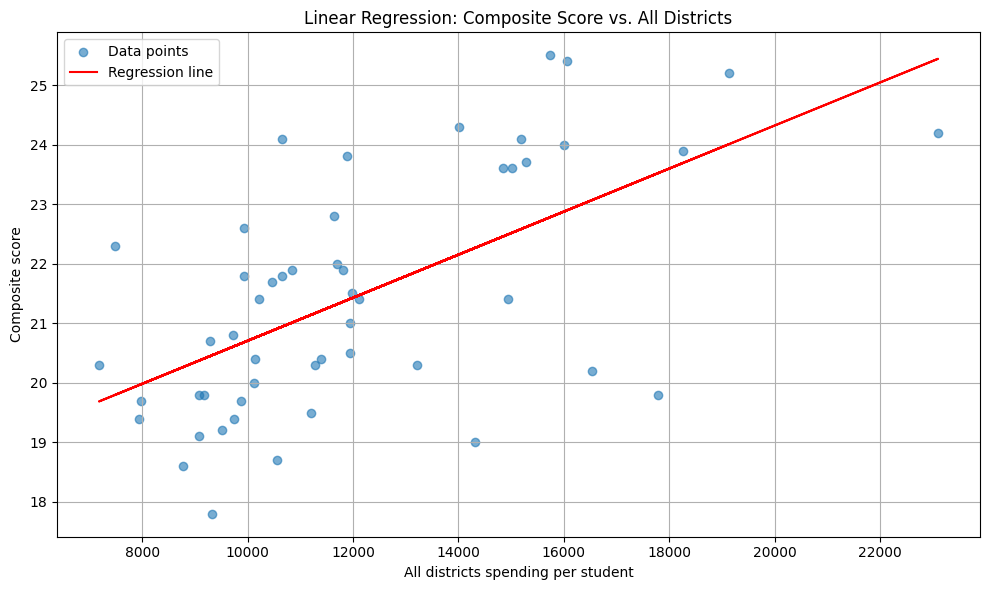

In [10]:
X = df["All districts"]
y = df["Composite score"]

# Add constant term for intercept
X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const).fit()

# Print regression summary
print("\nLinear Regression Summary:")
print(model.summary())

# --- Visualization using matplotlib ---
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points', alpha=0.6)
plt.plot(X, model.predict(X_with_const), color='red', label='Regression line')
plt.title("Linear Regression: Composite Score vs. All Districts")
plt.xlabel("All districts spending per student")
plt.ylabel("Composite score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
X = df["All districts"]
y = df["Composite score"]
X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const).fit()

p_value = model.pvalues["All districts"]

print(f"P-value for 'All districts': {p_value}")

P-value for 'All districts': 2.8343181000456997e-06
